In [17]:
const logfact = [0,[sum(log(i) for i=1:n) for n=1:50]...];

In [160]:
function jacobi_pols(n, a, b, z)
    if (n+a > length(logfact) || n+b > length(logfact))
        error("Error: j is too high, please check the implementation of jacobi polynomials!")
    end

    # special case when I can not calculate log
    if (z == 1) || (z == -1) 
        return sum((s % 2 == 0 ? 1.0 : -1.0) *
                exp(logfact[n+a+1] + logfact[n+b+1]-logfact[n-s+1]-logfact[a+s+1]-logfact[s+1]-logfact[n+b-s+1])*
                ((1-z)/2.0)^s*((1+z)/2.0)^(n-s) for s = 0:n)
    end

    # general case
    ls = log((1.0-z)/2.0);
    lc = log((1.0+z)/2.0);
    res = 0.0;
    for s = 0:n
        logs = logfact[(n+a+1)::Int] + logfact[(n+b+1)::Int]-
                    logfact[(n-s+1)::Int]-logfact[(a+s+1)::Int]-
                    logfact[(s+1)::Int]-logfact[(n+b-s+1)::Int];
        args = s*ls + (n-s)*lc;
        res += (s % 2 == 0 ? 1.0 : -1.0) * exp(logs+args);
    end
    return res;
end

jacobi_pols (generic function with 1 method)

In [196]:
function wignerd_hat(j, m1, m2, z)
        factor = ((abs(m1-m2)+m1-m2)/2) % 2 == 0 ? 1.0 : -1.0;
        am1 = abs(m1); am2 = abs(m2);
        M = (am1 > am2) ? am1 : am2;
        N = (am1 < am2) ? am1 : am2;
        gammas = logfact[Int(j-M+1)]+logfact[Int(j+M+1)]-(logfact[Int(j-N+1)]+logfact[Int(j+N+1)])
        return factor / 2^M * exp(gammas/2)*
               jacobi_pols(Int(j-M), Int(abs(m1-m2)), Int(abs(m1+m2)), z);
end

wignerd_hat (generic function with 1 method)

In [197]:
@time for i=1:100000
    wignerd_hat(5/2,3/2,1/2,2rand()-1)
    end
@time for i=1:100000
    wignerd_hat(5,3,1,2rand()-1)
end;

  0.050140 seconds
  0.033686 seconds


In [198]:
function wignerd(j, m1, m2, z)
        hat = wignerd_hat(j, m1, m2, z);
        xi = sqrt(1-z)^abs(Int(m1-m2))*sqrt(1+z)^abs(Int(m1+m2));
        return hat*xi;
end

wignerd (generic function with 1 method)

In [199]:
using Plots

In [200]:
wignerd(0,0,0,0.3)

1.0

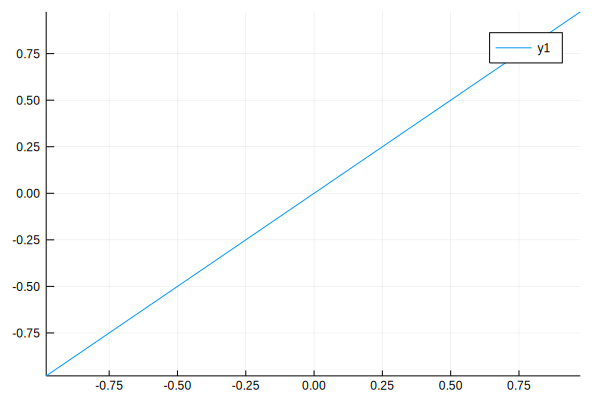

In [201]:
plot([z->wignerd(1,0,0,z)], -1, 1)

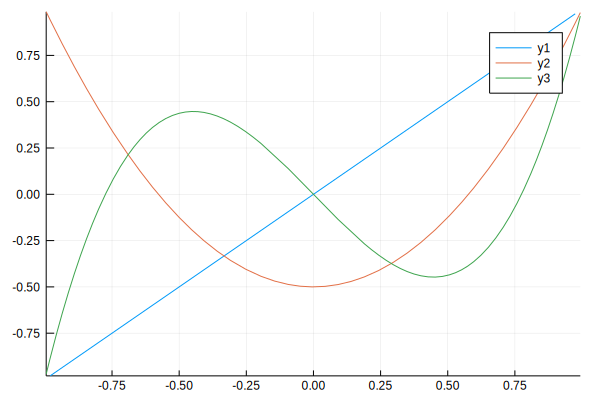

In [202]:
plot([z->wignerd(1,0,0,z)
      z->wignerd(2,0,0,z)
      z->wignerd(3,0,0,z)], -1, 1)

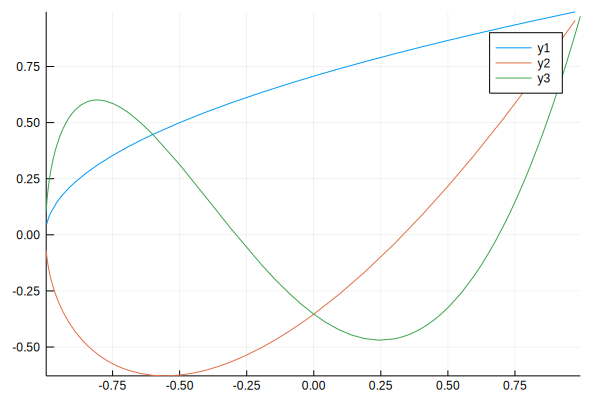

In [203]:
plot([z->wignerd(1/2,1/2,1/2,z)
      z->wignerd(3/2,1/2,1/2,z)
      z->wignerd(5/2,1/2,1/2,z)], -1, 1)

In [ ]:
cos(2t) = 2cos^2 t -1

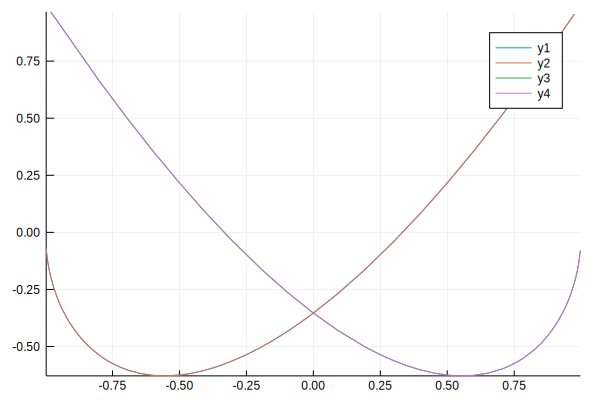

In [209]:
plot([z->wignerd(3/2,1/2,1/2, z),
      z->(3z-1)/2*sqrt((1+z)/2),
      z->wignerd(3/2,1/2,-1/2, z),
      z->-(3z+1)/2*sqrt((1-z)/2)],-1,1)

In [ ]:
using GSL

In [ ]:
function ClGd(j1,m1,j2,m2,j,m)
    factor = sqrt(2j+1)*(mod(Int(j1-j2+m),2)==1 ? -1 : +1)
    three_j = sf_coupling_3j(Int.(2.*[j1,j2,j,m1,m2,-m])...)
    return factor*three_j;
end